## Zadanie 1.

Napisz program, który wyszukuje największy wspólny dzielnik dwóch liczb $a$ i $b$. 

*Wskazówka*: warto w tym przypadku zastosować rekurencję.

In [1]:
using Random
Random.seed!(116772)
# Do rozwiązania zadania zastosowany zostanie algorytm Euklidesa 
function NWD(x,y)
    a = max(x,y)
    b = min(x,y)
while b ≠ 0
    r = mod(a,b)
    a = b
    b = r
end
a
end

#TEST
for i in 1:50
liczby=rand(1:200,2)
print(liczby," - NWD ")
println(NWD(liczby[1],liczby[2]))
end

[2, 109] - NWD 1
[119, 6] - NWD 1
[82, 140] - NWD 2
[13, 97] - NWD 1
[100, 73] - NWD 1
[14, 183] - NWD 1
[192, 26] - NWD 2
[127, 164] - NWD 1
[160, 176] - NWD 16
[160, 36] - NWD 4
[150, 120] - NWD 30
[41, 199] - NWD 1
[59, 39] - NWD 1
[82, 149] - NWD 1
[109, 129] - NWD 1
[103, 13] - NWD 1
[77, 32] - NWD 1
[73, 116] - NWD 1
[146, 7] - NWD 1
[99, 1] - NWD 1
[77, 144] - NWD 1
[98, 162] - NWD 2
[175, 168] - NWD 7
[183, 181] - NWD 1
[145, 52] - NWD 1
[140, 150] - NWD 10
[75, 27] - NWD 3
[38, 84] - NWD 2
[81, 120] - NWD 3
[74, 20] - NWD 2
[7, 136] - NWD 1
[109, 3] - NWD 1
[160, 99] - NWD 1
[134, 5] - NWD 1
[79, 114] - NWD 1
[5, 147] - NWD 1
[78, 192] - NWD 6
[110, 189] - NWD 1
[58, 1] - NWD 1
[36, 7] - NWD 1
[197, 106] - NWD 1
[109, 123] - NWD 1
[52, 44] - NWD 4
[79, 130] - NWD 1
[87, 57] - NWD 3
[92, 179] - NWD 1
[94, 189] - NWD 1
[69, 17] - NWD 1
[3, 5] - NWD 1
[159, 76] - NWD 1


## Zadanie 2.
    
Napisz funkcję, która dla dowolnego ciągu znaków sprawdzi czy jest on [palindromem](https://pl.wikipedia.org/wiki/Palindrom).

In [2]:
function palindrom(slowo ::String)
    len = length(slowo)
    for i in 1:(len/2)
        if(slowo[Int(len-i+1)] != slowo[Int(i)])
            println(slowo," to nie palindrom")
            return false
        end
    end
    println(slowo," to palindrom")
    return true
end

#TEST
lista_słów=["kajak","maslo","drewno","anna","arbuz","sedes","kobyla ma maly bok","kobylamamalybok"]
for słowo in lista_słów
    palindrom(słowo)
end

kajak to palindrom
maslo to nie palindrom
drewno to nie palindrom
anna to palindrom
arbuz to nie palindrom
sedes to palindrom
kobyla ma maly bok to nie palindrom
kobylamamalybok to palindrom


## Zadanie 3.
Napisz kod, który dla dowolnego $x \in R$ wyliczy wartość funkcji:
$f(x) = \sum_{k=-\infty}^{\infty}2^k d^2(x/2^k) $

gdzie $d$ jest odległością do najbliższej liczby całkowitej.

In [3]:
#Przy odpowiednim podejściu analitycznym można
#ograniczyć sumę od determinowanej przez x wartości do postaci szeregu.
#Formuła dla liczb ujemnych jest trudna do wyznaczenia analitycznie dlatego
#zastosowano przybliżenie poprzez ograniczenie zakresu do -1000
function f(x ::Float64)
sum=0
z=ceil(log2(2x))
for k in -1000:(z-1)
    t=2.0^k
    sum += t*(abs((x/t)-round(x/t)))^2
    end
    w = sum + (x^2)*(2.0^(1-z))
return w
end

println(f(8.14))

#suma dla tej funkcji osiąga wartość jej argumentu

8.14


## Zadanie 4.

Zaimplementuj w języku Python algorytm [sita Eratostenesa](https://pl.wikipedia.org/wiki/Sito_Eratostenesa), który zwróci w formie listy wszystkie liczby pierwsze z przedziału $[2,n]$.

In [4]:
function sito(n :: Int)
    a=[i for i in 2:n]
    i=0
    odp=[]
    while i < n^(1/2)
        push!(odp,a[1])
        i = a[1]
        deleteat!(a, findall(x->x % a[1] == 0, a))

    end
append!(odp,a)
return [odp]
end

sito(50)

1-element Vector{Vector{Any}}:
 [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]

## Zadanie 5.

Napisz funkcję, która zaszyfruje dowolny ciąg znaków za pomocą prostego szyfru [ROT13](https://en.wikipedia.org/wiki/ROT13). Dla uproszczenia przyjmij, że szyfrowaniu podlegają jedynie litery alfabetu łacińskiego.

Dodatkowo, możesz rozbudować program do formy, w której szyfruje on ciąg znaków dla dowolnego [szyfru Cezara](https://pl.wikipedia.org/wiki/Szyfr_Cezara), gdzie przesunięcie znaków jest zadanym przez użytkownika parametrem.

In [48]:
#Rot13 dla małych liter
function rot13(t)
angielski_list=Dict('a' =>'n' ,'b'=>'o','c'=>'p','d'=>'q','e'=>'r','f'=>'s','g'=>'t','h'=>'u',
        'i'=>'v','j'=>'w','k'=>'x','l'=>'y','m'=>'z'
        ,'n'=>'a','o'=>'b','p'=>'c','q'=>'d','r'=>'e','s'=>'f','t'=>'g','u'=>'h','v'=>'i','w'=>'j'
        ,'x'=>'k','y'=>'l','z'=>'m',' '=>' ','_'=>'_')
w=[]
    for i in t
    angielski_list[i]
    push!(w,angielski_list[i])
    end
return join(w)
end

#Test
słowo_odp="oyn bla"
println("poprawna odpowiedź: ",słowo_odp)
println("odpowiedź programu: ", rot13("bla oyn"))

poprawna odpowiedź: oyn bla
odpowiedź programu: oyn bla


## Zadanie 6.
    
Napisz kod, który wyliczy liczbę $\pi$ korzystając z [metody Monte Carlo](https://en.wikipedia.org/wiki/Monte_Carlo_method). Jako parametr wejściowy przyjmij $n$, oznaczające liczbę losowanych punktów. Przedstaw na wykresie błąd względny wyliczenia $\pi$ w porównaniu z wbudowaną stałą <tt>pi</tt> dla wartości $n \in [100,500,1000,1500,2000, \dots,10000]$

Założenia metody monte carlo:
Określamy przestrzeń dwuwymiarową x,y z przedziału [0,1]  (układ kartezjański)
Ustalamy koordynaty koła wpisanego w powstały kwadrat (środek okręgu S(0.5,0.5))
Stusunek koła do kwadratu wewnątrz którego jest wpisany 
jest stały dla dowolnej długości boku a kwadratu Pₖ / Pₛ = 

0.25*πa²/a² stąd Pk/Ps= π/4 

#π=4*Pk/Ps

Gdyby losować kolejne punkty wewnątrz tej przestrzeni stopniowo ją zapełniając 
(przyjmując, że jest to możliwe) dla nieskończonej liczby punktów stosunek pól byłby równy stosunkowi
punktów zawierających się w kole do wszyskich wylosowanych. W oparciu o to rozumowanie można
wyznaczyć przybliżenie liczby π.

In [6]:
using Random
Random.seed!(116772)
function Montecarlo(n)
    koord= rand(n,2)
    inside=0
    for i in 1:n
        if ((koord[i,1]-0.5)^2+(koord[i,2]-0.5)^2)^(0.5)<0.5
        inside += 1
        end
    end
return [n (π-(4*inside/n))/π]
end

aprox_list = Montecarlo(100)

for z in 500:500:10000
    aprox_list=[aprox_list ; Montecarlo(z)]

end
#print(aprox_list)

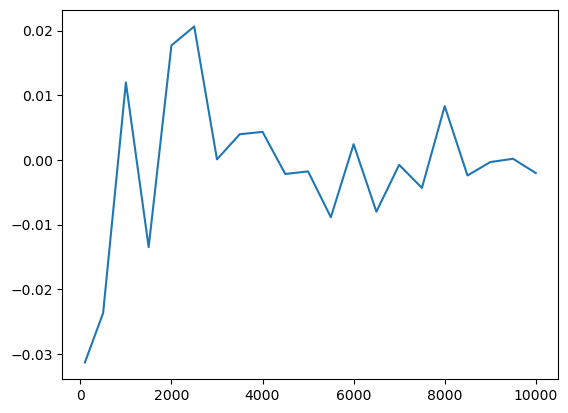

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [7]:
using PyPlot
plot(aprox_list[:,1],aprox_list[:,2])
show()

## Zadanie 7. (dodatkowe)

Rozwiąż problem #96 dostepny na stronie [project Euler](https://projecteuler.net/problem=96)